In [1]:
# Project 1 Team 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import plotly.graph_objects as go

archive_path = "archive/MoviesOnStreamingPlatforms.csv"
ticket_sales_path = "TicketSales/AnnualTicketSales.csv"
gross_path = "TicketSales/HighestGrossers.csv"
creative_types_path = "TicketSales/PopularCreativeTypes.csv"
top_distributors_path = "TicketSales/TopDistributors.csv"
top_genres_path = "TicketSales/TopGenres.csv"
top_gross_ratings_path = "TicketSales/TopGrossingRatings.csv"
top_gross_source_path = "TicketSales/TopGrossingSources.csv"
top_production_path = "TicketSales/TopProductionMethods.csv"
subscriber_count_path = "subscription/svod-subscriber-count.csv"
ticket_sold_path = "subscription/tickets-sold-at-box-offices.csv"
subscription_price_path = "subscription/svod-services-monthly-subscription-price.csv"
user_share_path = "subscription/svod-service-user-shares.csv"
hulu_subscribers = "subscription/hulus-paying-subscribers-copy.csv"
disney_subscribers = "subscription/disney-subscribers-count-copy.csv"
home_vs_theater_path = "subscription/adults-who-preferred-to-watch-films-in-a-theater-or-at-home.csv"
netflix_subscribers = "subscription/statistic_id250937_quarterly-netflix-paid-streaming-subscribers-in-the-us-and-canada-2013-2023-copy.csv"
alberto_hulus = "subscription/alberto-hulus.csv"
alberto_disney = "subscription/alberto-disney.csv"
alberto_netflix = "subscription/alberto-netflix.csv"
alberto_box_office = "subscription/alberto-box-office.csv"

df_archive = pd.read_csv(archive_path)
df_ticket_sales = pd.read_csv(ticket_sales_path)
df_gross = pd.read_csv(gross_path)
df_creative_types = pd.read_csv(creative_types_path)
df_top_distributors = pd.read_csv(top_distributors_path)
df_genres = pd.read_csv(top_genres_path)
df_ratings = pd.read_csv(top_gross_ratings_path)
df_source = pd.read_csv(top_gross_source_path)
df_production = pd.read_csv(top_production_path)
df_sub_count = pd.read_csv(subscriber_count_path)
df_ticket_sold = pd.read_csv(ticket_sold_path)
df_sub_price = pd.read_csv(subscription_price_path)
df_user_share = pd.read_csv(user_share_path)
df_hulu = pd.read_csv(hulu_subscribers)
df_disney = pd.read_csv(disney_subscribers)
df_home_vs_theater = pd.read_csv(home_vs_theater_path)
df_netflix = pd.read_csv(netflix_subscribers)
df_anetflix = pd.read_csv(alberto_netflix)
df_ahulus = pd.read_csv(alberto_hulus)
df_adisney = pd.read_csv(alberto_disney)
df_box_office = pd.read_csv(alberto_box_office)




In [2]:
# Merge Hulu, Disney, and Netflix Subs

In [3]:
left = pd.read_csv(hulu_subscribers)
right = pd.read_csv(disney_subscribers)
right2 = pd.read_csv(netflix_subscribers)


result = pd.merge(left, right, on=["Quarter", "Year", "Subs", "Company"], how="outer")

final_result = pd.merge(result, right2, on=["Quarter", "Year", "Subs", "Company"], how="outer")

final_result

,Quarter,Year,Subs,Company
0,Q4,2010,0.30,Hulu
1,Q1,2011,0.50,Hulu
2,Q2,2011,0.90,Hulu
3,Q3,2011,1.20,Hulu
4,Q4,2011,1.50,Hulu
...,...,...,...,...
88,Q1,2022,74.58,Netflix
89,Q2,2022,73.28,Netflix
90,Q3,2022,73.39,Netflix
91,Q4,2022,74.30,Netflix


In [33]:
print("Hello world")

Hello world


In [4]:
#Define data that seperates the covid vs precovid years
#Precovid years 2017-2019 covid years 2020-2022
PreCovid_Yearly = final_result[~final_result['Year'].isin([2020,2021,2022,2023])]



PreCovid_Yearly

,Quarter,Year,Subs,Company
0,Q4,2010,0.30,Hulu
1,Q1,2011,0.50,Hulu
2,Q2,2011,0.90,Hulu
3,Q3,2011,1.20,Hulu
4,Q4,2011,1.50,Hulu
5,Q1,2012,2.00,Hulu
6,Q2,2012,NaN,Hulu
7,Q3,2012,NaN,Hulu
8,Q4,2012,3.00,Hulu
9,Q1,2013,4.00,Hulu


In [5]:
Covid_Yearly = final_result[~final_result['Year'].isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2023])]



Covid_Yearly

,Quarter,Year,Subs,Company
24,Q1,2020,30.40,Hulu
25,Q2,2020,32.10,Hulu
26,Q3,2020,35.50,Hulu
27,Q4,2020,36.60,Hulu
28,Q1,2021,39.40,Hulu
29,Q2,2021,41.60,Hulu
30,Q3,2021,42.80,Hulu
31,Q4,2021,43.80,Hulu
32,Q1,2022,45.30,Hulu
33,Q2,2022,45.60,Hulu


In [6]:
#Drop the quarter column from our dataframes and clean it up
#Notice we had multiple years due to the data was calculated in quarters for the years
PreCovid_Subs= PreCovid_Yearly.drop(columns=["Quarter"])
#try groupby method
final_PreCovid = PreCovid_Subs.groupby(['Year', 'Company']).agg({'Subs': ['mean']})
#create a column and reset index
final_PreCovid.columns = ['Subs(million)']

final_PreCovid = final_PreCovid.reset_index()


final_PreCovid

,Year,Company,Subs(million)
0,2010,Hulu,0.3000
1,2011,Hulu,1.0250
2,2012,Hulu,2.5000
3,2013,Hulu,4.5000
4,2013,Netflix,29.5425
5,2014,Hulu,6.0000
6,2014,Netflix,35.8600
7,2015,Hulu,9.0000
8,2015,Netflix,41.7125
9,2016,Hulu,12.0000


In [7]:
#same thing we did but for Covid years
Covid_Subs= Covid_Yearly.drop(columns=["Quarter"])
#try groupby method
final_Covid = Covid_Subs.groupby(['Year', 'Company']).agg({'Subs': ['mean']})
#create a column and reset index
final_Covid.columns = ['Subs(million)']

final_Covid = final_Covid.reset_index()


final_Covid

,Year,Company,Subs(million)
0,2020,Disney,89.0500
1,2020,Hulu,33.6500
2,2020,Netflix,72.4725
3,2021,Disney,108.1500
4,2021,Hulu,41.9000
5,2021,Netflix,74.3925
6,2022,Disney,145.9500
7,2022,Hulu,46.0750
8,2022,Netflix,73.8875


Text(0, 0.5, '# of Streaming Subscriptions(Millions)')

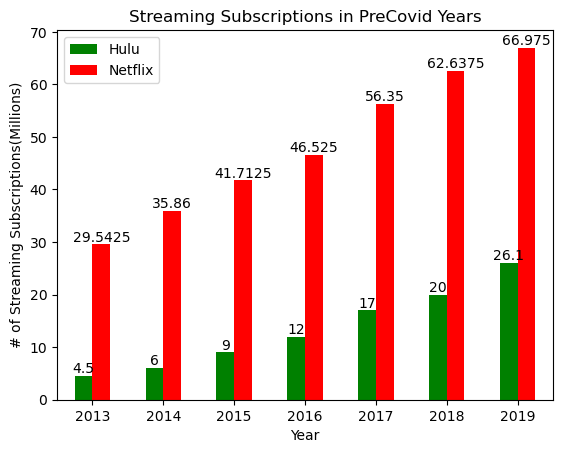

In [8]:
#make bar charts showing the Precovid years

bar_PreCoviddf = pd.DataFrame({'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019],
                   'Hulu': [4.5000, 6.0000, 9.0000, 12.0000, 17.0000, 20.0000, 26.1000],
                   'Netflix': [29.5425, 35.8600, 41.7125, 46.5250, 56.3500, 62.6375, 66.9750]})
                   

#plot columns on bar chart
ax=bar_PreCoviddf[['Year', 'Hulu', 'Netflix']].plot(x='Year', color={"Hulu": "green", "Netflix": "red"}, title="Streaming Subscriptions in PreCovid Years", kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation='horizontal')

plt.ylabel("# of Streaming Subscriptions(Millions)") 

Text(0, 0.5, '# of Streaming Subscriptions(Millions)')

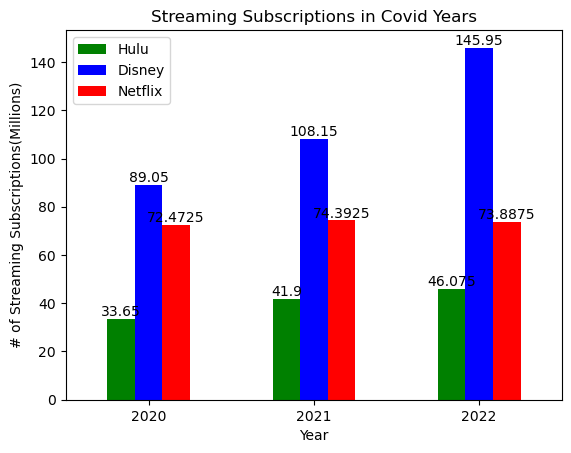

In [9]:

bar_Coviddf = pd.DataFrame({'Year': [2020, 2021, 2022],
                   'Hulu': [33.6500, 41.9000, 46.0750],
                    'Disney': [89.0500, 108.1500, 145.9500],
                   'Netflix': [72.4725, 74.3925, 73.8875]})
                   

#plot columns on bar chart

ax=bar_Coviddf[['Year', 'Hulu', 'Disney', 'Netflix']].plot(x='Year', color={"Hulu": "green", "Disney":"blue", "Netflix": "red"},  title="Streaming Subscriptions in Covid Years", kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation='horizontal')

plt.ylabel("# of Streaming Subscriptions(Millions)") 

In [10]:
#Define data Precovid years 2017-2019 
precovid_yrs = final_result[~final_result['Year'].isin([2010,2011,2012,2013,2014,2015,2016,2020,2021,2022,2023])]

precovid_yrs

,Quarter,Year,Subs,Company
17,Q4,2017,17.00,Hulu
18,Q2,2018,20.00,Hulu
19,Q3,2018,NaN,Hulu
20,Q1,2019,22.80,Hulu
21,Q2,2019,25.20,Hulu
22,Q3,2019,27.90,Hulu
23,Q4,2019,28.50,Hulu
68,Q1,2017,54.58,Netflix
69,Q2,2017,55.62,Netflix
70,Q3,2017,56.78,Netflix


In [11]:
#Define data Covid years 2020-2022 
covid_yrs = final_result[~final_result['Year'].isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2023])]

covid_yrs

,Quarter,Year,Subs,Company
24,Q1,2020,30.40,Hulu
25,Q2,2020,32.10,Hulu
26,Q3,2020,35.50,Hulu
27,Q4,2020,36.60,Hulu
28,Q1,2021,39.40,Hulu
29,Q2,2021,41.60,Hulu
30,Q3,2021,42.80,Hulu
31,Q4,2021,43.80,Hulu
32,Q1,2022,45.30,Hulu
33,Q2,2022,45.60,Hulu


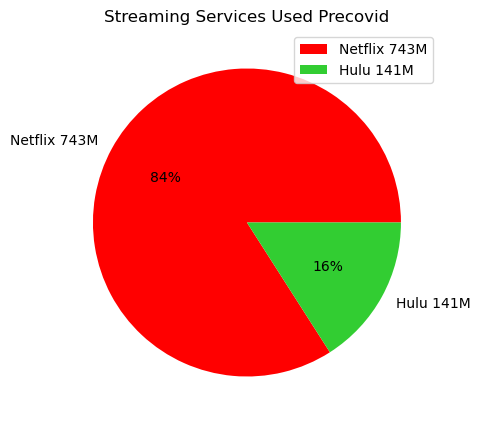

In [12]:
#Pie Chart Reflecting Streaming services during precovid years 2017-2019
pre_covid_pie = pd.DataFrame({'': [743,141]},index = ['Netflix 743M', 'Hulu 141M'])

# The colors of each section of the pie chart
colors = ["red", "limegreen",]

plot = pre_covid_pie.plot.pie(y= "", title= "Streaming Services Used Precovid",colors= colors, autopct="%1.f%%", figsize=(5, 5))
plt.show()

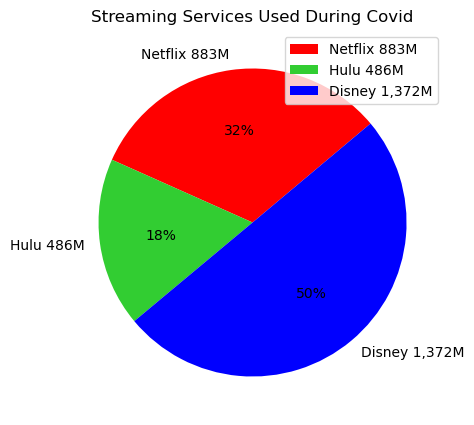

In [13]:
#Pie Chart Reflecting Streaming services during covid years 2020-2022
covid_pie = pd.DataFrame({'': [883.01,486.5,1372]},index = ['Netflix 883M', 'Hulu 486M', 'Disney 1,372M'])

# The colors of each section of the pie chart
colors = ["red", "limegreen", "blue"]

plot = covid_pie.plot.pie(y="", title= "Streaming Services Used During Covid", startangle =40, autopct="%1.f%%", colors = colors, figsize=(5, 5))
plt.show()

In [14]:
# Merge Hulu, Disney, and Netflix Subs
left = pd.read_csv(alberto_hulus)
right = pd.read_csv(alberto_disney)
right2 = pd.read_csv(alberto_netflix)



result = pd.merge(left, right, on=["Year","Subs"], how="outer")

final_result = pd.merge(result, right2, on=["Year","Subs"], how="outer")
# Print Final Result & Send To CSV

In [15]:
# Print Final Result & Send To CSV
print(final_result)

   Year    Subs
0  2018   20.00
1  2022  184.30
2  2022  583.80
3  2018  250.55
4  2022  295.55


In [16]:
final_result.to_csv('streaming_subs_totals.csv')


In [17]:
streaming_services_totals = "subscription/streaming_subs_totals.csv"


df_streaming_services_totals = pd.read_csv(streaming_services_totals)

In [18]:
# Merge DFs & Export to CSV to Edit
left1 = pd.read_csv(streaming_services_totals)
right1 = pd.read_csv(alberto_box_office)

result = pd.merge(left1, right1, on=["Year","Sales"], how="outer")

result.to_csv('sales_2018_2022.csv')

In [19]:
sales = "subscription/sales_2018_2022e.csv"
df_sales = pd.read_csv(sales)


df_sales

,Unnamed: 0,Year,Sales
0,0,2018,270.55
1,1,2022,1063.65
2,5,2018,1311.30
3,6,2022,812.79


Text(0, 0.5, 'Sales in Millions')

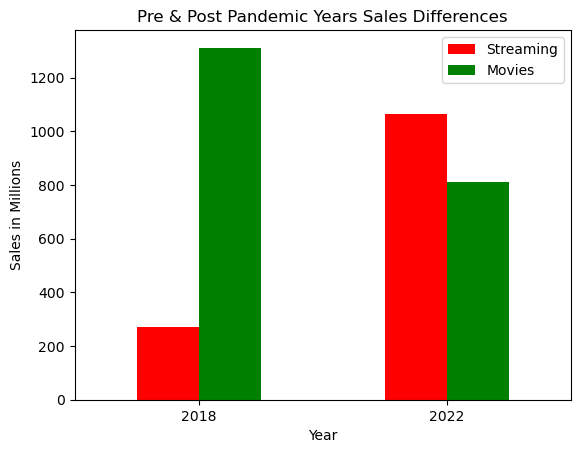

In [20]:
#Plot DF and Bar Chart
df_final = pd.DataFrame({'Year':[2018, 2022],'Streaming': [270.55, 1063.65], 'Movies':[1311.30, 812.79]})
#Plot Columns
df_final[['Year', 'Streaming', 'Movies']].plot(x='Year', color={"Streaming": "Red", "Movies": "Green"}, title="Pre & Post Pandemic Years Sales Differences", kind='bar')

plt.xticks(rotation='horizontal')
plt.ylabel("Sales in Millions")

In [21]:
# print the ticket sales head for review
df_ticket_sales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [22]:
# drop the "unnamed: 5" column
df_ticket_sales = df_ticket_sales.drop('Unnamed: 5', axis=1)
df_ticket_sales.head(7)

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97
5,2016,"1,30,25,56,378","$11,267,115,924","$11,931,416,424",$8.65
6,2015,"1,32,33,56,776","$11,155,900,636","$12,121,948,075",$8.43


In [23]:
# Remove commas any dollar signs from the data frame
cols = ['YEAR', 'TICKETS SOLD', 'TOTAL BOX OFFICE', 'TOTAL INFLATION ADJUSTED BOX OFFICE', 'AVERAGE TICKET PRICE']
df_ticket_num = df_ticket_sales[cols].replace({'\$': '', ',': ''}, regex=True)
# Convert columns to numeric values
df_ticket_num['TICKETS SOLD'] = pd.to_numeric(df_ticket_num['TICKETS SOLD'])
df_ticket_num['TOTAL BOX OFFICE'] = pd.to_numeric(df_ticket_num['TOTAL BOX OFFICE'])
df_ticket_num['TOTAL INFLATION ADJUSTED BOX OFFICE'] = pd.to_numeric(df_ticket_num['TOTAL INFLATION ADJUSTED BOX OFFICE'])
df_ticket_num['AVERAGE TICKET PRICE'] = pd.to_numeric(df_ticket_num['AVERAGE TICKET PRICE'])
# print data types
print(df_ticket_num.dtypes)

YEAR                                     int64
TICKETS SOLD                             int64
TOTAL BOX OFFICE                         int64
TOTAL INFLATION ADJUSTED BOX OFFICE      int64
AVERAGE TICKET PRICE                   float64
dtype: object


In [24]:
# Reset year range from 2015 to 2021
df_ticket_year = df_ticket_num[df_ticket_num['YEAR'].isin([x for x in range(2015,2022)])]
# Plot points into a Scatter line graph for Tickets sold, Total Box Office, and Total Inflation
fig_box_office = go.Figure(data=[
    go.Scatter(name='Tickets Sold', x=df_ticket_year['YEAR'], y=df_ticket_year['TICKETS SOLD']),
    go.Scatter(name='Total Box Office', x=df_ticket_year['YEAR'], y=df_ticket_year['TOTAL BOX OFFICE']),
    go.Scatter(name='Total Inflation Adjusted Box Office', x=df_ticket_year['YEAR'], y=df_ticket_year['TOTAL INFLATION ADJUSTED BOX OFFICE'])])
# Update Graph Titles
fig_box_office.update_layout(title_text="Tickets sold, Total box office, and Total inflation from 2015 to 2021",
    font=dict(size=15),
    xaxis_title="Years",
    yaxis_title="Billions",
    legend_title="Legend Title"
)
# Print Line Graph
fig_box_office.show()
# Calculate analysis
revenue_lost = round(100-(df_ticket_year["TOTAL BOX OFFICE"].values[1]/df_ticket_year["TOTAL BOX OFFICE"].values[2])*100)
tickets_lost = round(100-(df_ticket_year["TICKETS SOLD"].values[1]/df_ticket_year["TICKETS SOLD"].values[2])*100)
tickets_lost1 = round((df_ticket_year["TICKETS SOLD"].values[0]-df_ticket_year["TICKETS SOLD"].values[1])/df_ticket_year["TICKETS SOLD"].values[3]*100)
revenue_lost1 = round((df_ticket_year["TOTAL BOX OFFICE"].values[0]-df_ticket_year["TOTAL BOX OFFICE"].values[1])/df_ticket_year["TOTAL BOX OFFICE"].values[3]*100)
# Print an analysis
print("Percentage of Total Box Office Revenue decreased between COVID 2019 to 2020 by " + str(revenue_lost) + "%.")
print("Percentage of Total Tickets dcreased between COVID 2019 to 2020 by " + str(tickets_lost) + "%.")
print("Percentage of Total Box Office Revenue increased between 2020 to 2021 by " + str(revenue_lost1) + "% of original 2019 revenue.")
print("Percentage of Total Tickets increased between 2020 to 2021 by " + str(tickets_lost1) + "% of original 2019 revenue.")


Percentage of Total Box Office Revenue decreased between COVID 2019 to 2020 by 82%.
Percentage of Total Tickets dcreased between COVID 2019 to 2020 by 82%.
Percentage of Total Box Office Revenue increased between 2020 to 2021 by 15% of original 2019 revenue.
Percentage of Total Tickets increased between 2020 to 2021 by 15% of original 2019 revenue.


In [25]:
# Plot points into a Scatter line graph for Average Ticket Prices
fig_ticket_price = go.Figure(data=[
    go.Scatter(name='Average Ticket Price', x=df_ticket_year['YEAR'], y=df_ticket_year['AVERAGE TICKET PRICE'])])
# Update Graph Title
fig_ticket_price.update_layout(title_text = "Average Ticket Price from 2015 to 2021",
    font=dict(size=15),
    xaxis_title="Years",
    yaxis_title="Ticket Price $")
# Print Line Graph
fig_ticket_price.show()
# Calculate analysis
ticket_price_gain = round(100-(df_ticket_year["AVERAGE TICKET PRICE"].values[6]/df_ticket_year["AVERAGE TICKET PRICE"].values[2])*100)
ticket_price_lost = round(100-(df_ticket_year["AVERAGE TICKET PRICE"].values[1]/df_ticket_year["AVERAGE TICKET PRICE"].values[2])*100)
# Print an analysis
print("Percentage of increase in price of tickets between 2015 to COVID 2019: " + str(ticket_price_gain) + "%.")
print("Percentage of increase in price of tickets between COVID 2019 to 2022: " + str(ticket_price_lost) + "%.")


Percentage of increase in price of tickets between 2015 to COVID 2019: 8%.
Percentage of increase in price of tickets between COVID 2019 to 2022: 0%.


In [26]:
# Merge disney, hulu, and netflix subscriptions
result_sub = pd.merge(df_hulu, df_disney, on=["Quarter", "Year", "Subs", "Company"], how="outer")
final_result_sub = pd.merge(result_sub, df_netflix, on=["Quarter", "Year", "Subs", "Company"], how="outer")
# Print data frame
final_result_sub

,Quarter,Year,Subs,Company
0,Q4,2010,0.30,Hulu
1,Q1,2011,0.50,Hulu
2,Q2,2011,0.90,Hulu
3,Q3,2011,1.20,Hulu
4,Q4,2011,1.50,Hulu
...,...,...,...,...
88,Q1,2022,74.58,Netflix
89,Q2,2022,73.28,Netflix
90,Q3,2022,73.39,Netflix
91,Q4,2022,74.30,Netflix


In [27]:
# Group Data with the same year and company
final_sub_year = final_result_sub.groupby(['Year', 'Company']).agg({'Subs': ['mean']})
# Create a new coloumn
final_sub_year.columns = ['Subs(mil)']
# reset index
final_sub_year = final_sub_year.reset_index()
# print data frame
final_sub_year.head(10)

,Year,Company,Subs(mil)
0,2010,Hulu,0.3000
1,2011,Hulu,1.0250
2,2012,Hulu,2.5000
3,2013,Hulu,4.5000
4,2013,Netflix,29.5425
5,2014,Hulu,6.0000
6,2014,Netflix,35.8600
7,2015,Hulu,9.0000
8,2015,Netflix,41.7125
9,2016,Hulu,12.0000


In [28]:
# Make a dataframe of only Hulu
sub_hulu = final_sub_year[final_sub_year.Company == 'Hulu']
# Reduce the years from 2015 to 2023
sub_hulu_year = sub_hulu[sub_hulu['Year'].isin([x for x in range(2017,2024)])]
sub_hulu_year = sub_hulu_year.reset_index()
# Print the dataframe
sub_hulu_year

,index,Year,Company,Subs(mil)
0,11,2017,Hulu,17.000
1,13,2018,Hulu,20.000
2,15,2019,Hulu,26.100
3,18,2020,Hulu,33.650
4,21,2021,Hulu,41.900
5,24,2022,Hulu,46.075
6,27,2023,Hulu,48.100


In [29]:
# Make a dataframe of only Disney
sub_disney = final_sub_year[final_sub_year.Company == 'Disney']
sub_disney = sub_disney.reset_index()
# Print the dataframe
sub_disney

,index,Year,Company,Subs(mil)
0,17,2020,Disney,89.05
1,20,2021,Disney,108.15
2,23,2022,Disney,145.95
3,26,2023,Disney,159.80


In [30]:
# Make a dataframe of only Netflix
sub_netflix = final_sub_year[final_sub_year.Company == 'Netflix']
# Reduce the years from 2015 to 2023
sub_netflix_year = sub_netflix[sub_netflix['Year'].isin([x for x in range(2017,2024)])]
sub_netflix_year = sub_netflix_year.reset_index()
# Print the dataframe
sub_netflix_year

,index,Year,Company,Subs(mil)
0,12,2017,Netflix,56.3500
1,14,2018,Netflix,62.6375
2,16,2019,Netflix,66.9750
3,19,2020,Netflix,72.4725
4,22,2021,Netflix,74.3925
5,25,2022,Netflix,73.8875
6,28,2023,Netflix,74.4000


In [31]:
# Plot Disney, Hulu, and Neflix subscribers
fig_sub = go.Figure(data=[
    go.Scatter(name='Hulu', x=sub_hulu_year['Year'], y=sub_hulu_year['Subs(mil)']),
    go.Scatter(name='Disney', x=sub_disney['Year'], y=sub_disney['Subs(mil)']),
    go.Scatter(name='Netflix', x=sub_netflix_year['Year'], y=sub_netflix_year['Subs(mil)'])])
# Update Graph Titles
fig_sub.update_layout(title_text="Online Video Subsciption Subsribers from 2017 to 2023",
    font=dict(size=15),
    xaxis_title="Years",
    yaxis_title="Millions of Subscribers",
    legend_title="Legend Title")
# Print Line Graph
fig_sub.show()
# Calculate analysis
sub_gain_2020 = sub_hulu_year['Subs(mil)'].values[4]+sub_disney['Subs(mil)'].values[0]+sub_netflix_year['Subs(mil)'].values[3]
sub_gain_2023 = sub_hulu_year['Subs(mil)'].values[6]+sub_disney['Subs(mil)'].values[3]+sub_netflix_year['Subs(mil)'][6]
sub_gain = sub_gain_2023-sub_gain_2020
sub_gain_pct = round(sub_gain/sub_gain_2020*100)
# Print Analysis
print("The three top main online streaming providers had an increase of " +str(round(sub_gain))+" million subscribers from 2020 to 2023.")
print("Which is a "+str(sub_gain_pct)+"% increase in streaming subscribers.")


The three top main online streaming providers had an increase of 79 million subscribers from 2020 to 2023.
Which is a 39% increase in streaming subscribers.


In [32]:
df_ticket_plot = df_ticket_year.copy()
df_ticket_plot['TOTAL BOX OFFICE'] = (df_ticket_plot['TOTAL BOX OFFICE']/100000000)
df_ticket_plot['TOTAL INFLATION ADJUSTED BOX OFFICE'] = (df_ticket_plot['TOTAL INFLATION ADJUSTED BOX OFFICE']/100000000)
df_ticket_plot['TICKETS SOLD'] = (df_ticket_plot['TICKETS SOLD']/10000000)

# Plot Subscribers and Box Office Revenue
fig_sub = go.Figure(data=[
    go.Scatter(name='Hulu (in Millions)', x=sub_hulu_year['Year'], y=sub_hulu_year['Subs(mil)']),
    go.Scatter(name='Disney (in Millions)', x=sub_disney['Year'], y=sub_disney['Subs(mil)']),
    go.Scatter(name='Netflix (in Millions)', x=sub_netflix_year['Year'], y=sub_netflix_year['Subs(mil)']),
    go.Scatter(name='Tickets Sold (in 10 millions)', x=df_ticket_plot['YEAR'], y=df_ticket_plot['TICKETS SOLD']),
    go.Scatter(name='Total Box Office (in 100 Millions)', x=df_ticket_plot['YEAR'], y=df_ticket_plot['TOTAL BOX OFFICE'])])
# Update Graph Titles
fig_sub.update_layout(title_text="Online Video Subsciptions vs Box Office Revenue",
    font=dict(size=15),
    xaxis_title="Years",
    yaxis_title="Revenue, Tickets, and Subscribers",
    legend_title="Legend Title")
# Print Line Graph
fig_sub.show()
# Print Overall Analysis
print("As you can see from the line charts provided. Total Box Office revenue saw an over 80% decrease in revenue in a single year from 2019 to 2020.")
print("The average price of tickets had no increase of price once COVID-19 hit and had no increases since due to the decline of people going to the movies and tighter budgets.")
print("While the three main streaming providers had a huge increase of 40% in subscribers from 2020 to 2023 which is an extra 80 million new subscribers!")
print("Subscribers are still increasing in streaming services as they add new content and platforms.")
print("Box Office revenue and ticket have gone up between 2020 and 2021 but only at a whopping 15% of the original 2019 sales.")
print("Without a new change coming. Movie theaters might not recover with such a slow increase in revenue and a high demand of new streaming subscribers.")


As you can see from the line charts provided. Total Box Office revenue saw an over 80% decrease in revenue in a single year from 2019 to 2020.
The average price of tickets had no increase of price once COVID-19 hit and had no increases since due to the decline of people going to the movies and tighter budgets.
While the three main streaming providers had a huge increase of 40% in subscribers from 2020 to 2023 which is an extra 80 million new subscribers!
Subscribers are still increasing in streaming services as they add new content and platforms.
Box Office revenue and ticket have gone up between 2020 and 2021 but only at a whopping 15% of the original 2019 sales.
Without a new change coming. Movie theaters might not recover with such a slow increase in revenue and a high demand of new streaming subscribers.
